# boston housing price prediction using linear regression and random forest

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data= pd.read_csv("boston.csv")
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [5]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


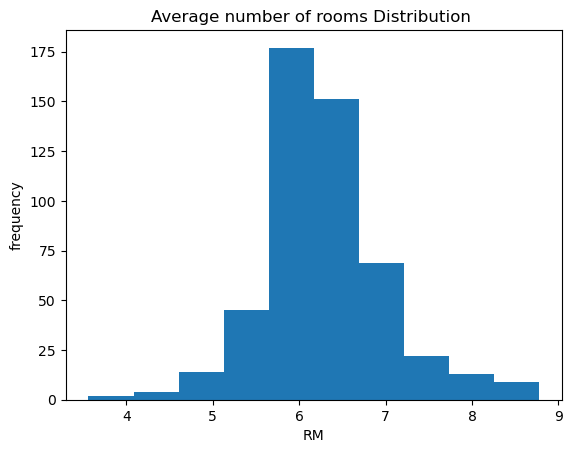

In [39]:
fig=plt.figure()
ax=fig.add_subplot(1, 1, 1)
ax.hist(data['RM'])
plt.title("Average number of rooms Distribution ")
plt.xlabel("RM")
plt.ylabel("frequency")
plt.show()

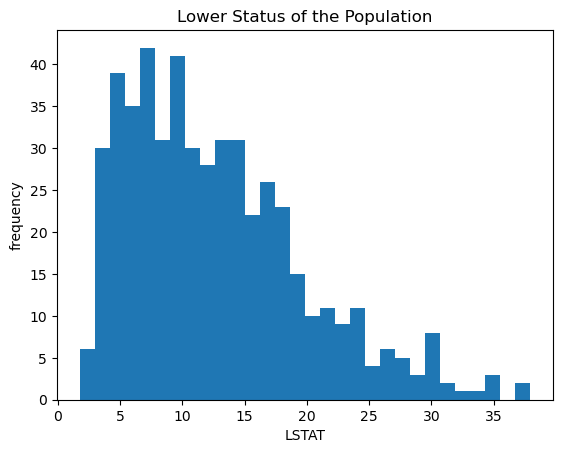

In [43]:
fig=plt.figure()
ax=fig.add_subplot(1, 1, 1)
ax.hist(data['LSTAT'], bins=30)
plt.title("Lower Status of the Population")
plt.xlabel("LSTAT")
plt.ylabel("frequency")
plt.show()

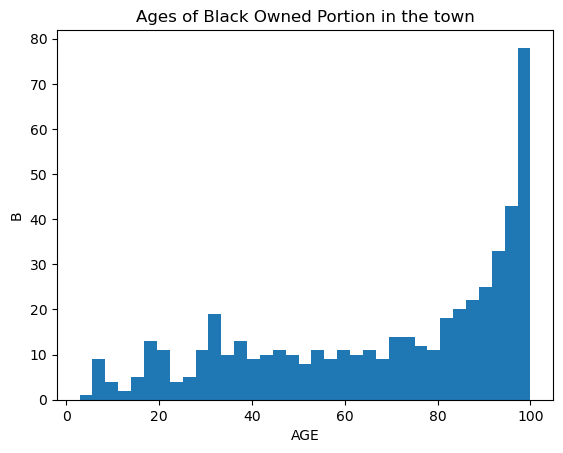

In [45]:
 fig=plt.figure()
ax=fig.add_subplot(1, 1, 1)
ax.hist(data['AGE'], bins = 35)
plt.title("Ages of Black Owned Portion in the town")
plt.xlabel("AGE")
plt.ylabel("B")
plt.show()

In [6]:
X= data.drop(['MEDV'], axis=1)
y=data['MEDV']

In [14]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split( X, y, test_size=0.3, random_state=0)

In [15]:
Xtrain

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
141,1.62864,0.0,21.89,0,0.624,5.019,100.0,1.4394,4,437.0,21.2,396.90,34.41
272,0.11460,20.0,6.96,0,0.464,6.538,58.7,3.9175,3,223.0,18.6,394.96,7.73
135,0.55778,0.0,21.89,0,0.624,6.335,98.2,2.1107,4,437.0,21.2,394.67,16.96
298,0.06466,70.0,2.24,0,0.400,6.345,20.1,7.8278,5,358.0,14.8,368.24,4.97
122,0.09299,0.0,25.65,0,0.581,5.961,92.9,2.0869,2,188.0,19.1,378.09,17.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0.28392,0.0,7.38,0,0.493,5.708,74.3,4.7211,5,287.0,19.6,391.13,11.74
192,0.08664,45.0,3.44,0,0.437,7.178,26.3,6.4798,5,398.0,15.2,390.49,2.87
117,0.15098,0.0,10.01,0,0.547,6.021,82.6,2.7474,6,432.0,17.8,394.51,10.30
47,0.22927,0.0,6.91,0,0.448,6.030,85.5,5.6894,3,233.0,17.9,392.74,18.80


In [16]:
Xtest

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
329,0.06724,0.0,3.24,0,0.460,6.333,17.2,5.2146,4,430.0,16.9,375.21,7.34
371,9.23230,0.0,18.10,0,0.631,6.216,100.0,1.1691,24,666.0,20.2,366.15,9.53
219,0.11425,0.0,13.89,1,0.550,6.373,92.4,3.3633,5,276.0,16.4,393.74,10.50
403,24.80170,0.0,18.10,0,0.693,5.349,96.0,1.7028,24,666.0,20.2,396.90,19.77
78,0.05646,0.0,12.83,0,0.437,6.232,53.7,5.0141,5,398.0,18.7,386.40,12.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
428,7.36711,0.0,18.10,0,0.679,6.193,78.1,1.9356,24,666.0,20.2,96.73,21.52
385,16.81180,0.0,18.10,0,0.700,5.277,98.1,1.4261,24,666.0,20.2,396.90,30.81
308,0.49298,0.0,9.90,0,0.544,6.635,82.5,3.3175,4,304.0,18.4,396.90,4.54


## linear regression 

In [17]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(Xtrain, ytrain)

LinearRegression()

In [27]:
y_pred = model.predict(Xtest) 

In [20]:
print((predictions)[0:5])

[24.9357079  23.75163164 29.32638296 11.97534566 21.37272478]


In [71]:
r2_score_of_model = model.score(X,y) 
print(r2_score_of_model)

0.7378284679886178


In [26]:
model.coef_ 

array([-1.21310401e-01,  4.44664254e-02,  1.13416945e-02,  2.51124642e+00,
       -1.62312529e+01,  3.85906801e+00, -9.98516565e-03, -1.50026956e+00,
        2.42143466e-01, -1.10716124e-02, -1.01775264e+00,  6.81446545e-03,
       -4.86738066e-01])

In [24]:
model.intercept_ 

37.93710774183254

In [49]:
from sklearn.metrics import mean_squared_error, r2_score

In [51]:
rmse_score = np.sqrt(mean_squared_error(ytest, y_pred))
print(rmse_score)

5.214975145375403


In [52]:
rsquared_score = r2_score(ytest, y_pred)
print(rsquared_score)

0.6733825506400195


In [73]:
training_acc= model.score(Xtrain,ytrain)*100
testing_acc= model.score(Xtest, y_pred)*100
print("training accuracy: " , training_acc)
print("testing accuracy: ",  testing_acc)
print("Model Accuracy:",r2_score(y,model.predict(X))*100)

training accuracy:  76.4545102694255
testing accuracy:  100.0
Model Accuracy: 73.78284679886178


## Random forest

In [59]:
from sklearn.ensemble import RandomForestRegressor

In [60]:
model_rf= RandomForestRegressor()
model_rf.fit(Xtrain,ytrain)

RandomForestRegressor()

In [61]:
y_pred2 = model_rf.predict(Xtest) 

In [65]:
rmse_score2 = np.sqrt(mean_squared_error(ytest, y_pred2))
print(rmse_score2)

3.8384919864789557


In [66]:
rsquared_score2 = r2_score(ytest, y_pred2)
print(rsquared_score2)

0.8230477155697952


In [74]:
training_acc2= model.score(Xtrain,ytrain)*100
testing_acc2= model.score(Xtest , y_pred2)*100
print("training accuracy: " , training_acc2)
print("testing accuracy: ",  testing_acc2)
print("Model Accuracy:",r2_score(y,model_rf.predict(X))*100)


training accuracy:  76.4545102694255
testing accuracy:  80.6910801561735
Model Accuracy: 93.70544004137922
